## Matching Session 3

It turns out that our pi for session 3 has a timing issue-- the RTC stops wheneever its unplugged, so the times for each session are wrong.

In order to match our user session data (the known times based on scheduling and E4 data) with the session data we recorded, we have a couple of things to base our comparisons with. 

- I ran a full test to start before giving it to anyone.
- A 'real test' will involve a TX_TIME_SEEN to start, a START_TRANSITION ~20-25 min later, and a TX_TIME_SEEN when its noticed.  It will have continuous data during that time.
- We can expect some chatter before (short files when I demoed turning it on and connecting) and we may see some files after (when a participant left the glasses on and/or the base station on).
- The clock is reset a few times when it does connect to wifi; we know that all actual test times must be in sync or after the time saved in the filename (i.e., if the actual test occurred on 5/10 at 3p, its filename must show a time that is at the latest 5/10 at 3p, but likely 5/9, 5/8... NEVER 5/11.

Upon examination, it does appear that a couple participants (22/24) actually went through 2 LED transitions, a la the original tests.  P2 lost watch connection during their test.

In [ ]:
# SPOILER -- after going through, looking at filesizes, dates, TX_TIME_SEEN (watch button presses) and START_TRANSITIONs, including plotting data that was ambiguous, we get this
sess3 = {
    'P21':['recording_042223_163025.csv', 'recording_042223_164800.csv'],
    'P20':['recording_042223_172722.csv', 'recording_042223_174457.csv'],
     'P9':['recording_042523_172124.csv', 'recording_042523_173950.csv', 'recording_042523_175824.csv'],
    'P16':['recording_042523_182156.csv', 'recording_042523_183930.csv'],
    'P17':['recording_042523_191910.csv', 'recording_042523_193649.csv'],
    'P18':['recording_042923_131212.csv', 'recording_042923_132945.csv', 'recording_042923_134718.csv', 'recording_042923_140450.csv'],
    'P15':['recording_043023_145633.csv', 'recording_043023_151411.csv'],
    'P19':['recording_043023_155843.csv', 'recording_043023_161624.csv'],
    'P24':['recording_043023_170450.csv', 'recording_043023_172256.csv'],
    'P24_2':['recording_043023_173319.csv', 'recording_043023_175422.csv'],  #P24 guessed an hour, looks like they did 2 transitions
    'P13':['recording_052023_233713.csv', 'recording_052023_235526.csv'],
    'P12':['recording_052123_012226.csv', 'recording_052123_014244.csv'],
     'P2':['recording_052123_024042.csv', 'recording_052123_025816.csv'], #lost watch connection
     'P5':['recording_052123_030959.csv', 'recording_052123_032804.csv'],
     'P3':['recording_061323_130555.csv', 'recording_061323_132342.csv'],
    'P22': ['recording_051023_204810.csv', 'recording_051023_212444.csv'],
    'P22_2': ['recording_051023_212444.csv', 'recording_051023_214213.csv', 'recording_051023_215941.csv'], #P22 guessed an hour, looks like they did 2 transitions
    'P23': ['recording_051023_224107.csv','recording_051023_225850.csv']
}

In [14]:
import os
import csv
from datetime import datetime, timedelta
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib widget

In [4]:
#Raw data is in
folder = '/Volumes/Secondary/PhDStudy_Results/PhDSession3RawData'

In [71]:
def process_csv_files(path):
    prev_time = None
    timestamps = []
    file_dict = {}

    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            filepath = os.path.join(path, filename)
            filesize = os.path.getsize(filepath)/(1024*1024)
            
            print(f'{filename}, File size: {filesize:.1f} MB')

            with open(filepath, 'r') as file:
                csv_reader = csv.reader(file)
                for i, row in enumerate(csv_reader):
                    if 'TX_TIME_SEEN' in row[3] or 'TRANSITION' in row[3]:
                        dt_object = datetime.strptime(row[1], '%Y-%m-%dT%H:%M:%S.%f')
                        formatted_time = dt_object.strftime('%m/%d %I:%M%p')
                        
                        if prev_time and dt_object - prev_time > timedelta(hours=1):
                            print('\n' + '-'*20 + '\n')
       
                        print(f'\t{i}: {formatted_time} {row[3]}')
                        
                        timestamps.append(dt_object)
                        if dt_object in file_dict:
                            file_dict[dt_object].append(filename)
                        else:
                            file_dict[dt_object] = [filename]

                        prev_time = dt_object
                        
    return timestamps, file_dict

def find_time_pairs(timestamps, file_dict):
    used_files = set()
    pairs = []
    timestamps.sort()

    for i in range(len(timestamps) - 1):
        time_diff = timestamps[i+1] - timestamps[i]
        minutes_diff = time_diff.total_seconds() / 60
        if 17 <= minutes_diff <= 40:
            pair_files = set(file_dict[timestamps[i]] + file_dict[timestamps[i+1]])
            if not any(file in used_files for file in pair_files):
                pairs.append((timestamps[i].strftime('%m/%d %I:%M%p'), timestamps[i+1].strftime('%m/%d %I:%M%p')))
                used_files.update(pair_files)

    for pair, files in zip(pairs, used_files):
        print(f'Time pair: {pair}, Files: {files}')
        
timestamps, file_dict = process_csv_files(folder)
find_time_pairs(timestamps, file_dict)

recording_042223_155512.csv, File size: 3.9 MB
	161: 04/22 03:56PM TX_TIME_SEEN
recording_042223_160252.csv, File size: 0.1 MB
	2: 04/22 04:03PM TX_TIME_SEEN
	3: 04/22 04:03PM TX_TIME_SEEN
recording_042223_160403.csv, File size: 11.8 MB
	99: 04/22 04:04PM TX_TIME_SEEN
recording_042223_162211.csv, File size: 5.3 MB
	4871: 04/22 04:29PM START_TRANSITION
	5441: 04/22 04:29PM TX_TIME_SEEN
recording_042223_163025.csv, File size: 12.1 MB
	2765: 04/22 04:34PM TX_TIME_SEEN
recording_042223_164800.csv, File size: 8.7 MB
	7887: 04/22 04:59PM START_TRANSITION
	8237: 04/22 04:59PM TX_TIME_SEEN
	8672: 04/22 05:00PM TX_TIME_SEEN
recording_042223_170053.csv, File size: 0.0 MB
recording_042223_172722.csv, File size: 10.2 MB
	4199: 04/22 05:33PM TX_TIME_SEEN
recording_042223_174457.csv, File size: 10.1 MB
	9224: 04/22 05:57PM START_TRANSITION
	9637: 04/22 05:58PM TX_TIME_SEEN
recording_042223_180230.csv, File size: 2.7 MB
	3151: 04/22 06:06PM TX_TIME_SEEN
recording_042223_180723.csv, File size: 0.0 MB


In [13]:
def process_csv_files(path):
    timestamps = []
    files = []

    for filename in sorted(os.listdir(path)):
        if filename.endswith('.csv'):
            filepath = os.path.join(path, filename)
            with open(filepath, 'r') as file:
                csv_reader = csv.reader(file)
                for i, row in enumerate(csv_reader):
                    if 'TX_TIME_SEEN' in row[3]:
                        dt_object = datetime.strptime(row[1], '%Y-%m-%dT%H:%M:%S.%f')
                        timestamps.append(dt_object)
                        files.append(filename)

    return timestamps, files

def find_time_pairs(timestamps, files):
    i = 0
    while i < len(timestamps) - 1:
        time_diff = timestamps[i+1] - timestamps[i]
        minutes_diff = time_diff.total_seconds() / 60
        if 17 <= minutes_diff <= 40:
            print(f'Time pair: {timestamps[i].strftime("%m/%d %I:%M%p")} - {timestamps[i+1].strftime("%m/%d %I:%M%p")}')
            print('Files:', files[i:i+2])
            i += 2
        else:
            i += 1

# Use function with your directory path
timestamps, files = process_csv_files(folder)
find_time_pairs(timestamps, files)


Time pair: 04/22 04:04PM - 04/22 04:29PM
Files: ['recording_042223_160403.csv', 'recording_042223_162211.csv']
Time pair: 04/22 04:34PM - 04/22 04:59PM
Files: ['recording_042223_163025.csv', 'recording_042223_164800.csv']
Time pair: 04/22 05:00PM - 04/22 05:33PM
Files: ['recording_042223_164800.csv', 'recording_042223_172722.csv']
Time pair: 04/25 05:25PM - 04/25 06:01PM
Files: ['recording_042523_172124.csv', 'recording_042523_175824.csv']
Time pair: 04/25 06:30PM - 04/25 06:56PM
Files: ['recording_042523_182156.csv', 'recording_042523_183930.csv']
Time pair: 04/25 07:03PM - 04/25 07:22PM
Files: ['recording_042523_185703.csv', 'recording_042523_191910.csv']
Time pair: 04/29 12:57PM - 04/29 01:24PM
Files: ['recording_042923_125701.csv', 'recording_042923_131212.csv']
Time pair: 04/30 02:59PM - 04/30 03:26PM
Files: ['recording_043023_145633.csv', 'recording_043023_151411.csv']
Time pair: 04/30 03:27PM - 04/30 03:58PM
Files: ['recording_043023_151411.csv', 'recording_043023_155031.csv']
T

In [77]:
def print_first_last(path, files):
    for filename in files:
        if filename.endswith('.csv'):
            filepath = os.path.join(path, filename)
            print(f'{filename}')
            last_row = []
            with open(filepath, 'r') as file:
                csv_reader = csv.reader(file)
                for i, row in enumerate(csv_reader):
                    last_row = row
                    if i==0:
                        print(last_row)
                print(last_row)

def print_rows(path, filename):
    if filename.endswith('.csv'):
        filepath = os.path.join(path, filename)
        with open(filepath, 'r') as file:
            csv_reader = csv.reader(file)
            for i, row in enumerate(csv_reader):
                if row[0] != 'g':
                    print(row)

#print_first_last(folder, ['recording_052123_005950.csv', 'recording_052123_011540.csv', 'recording_052123_012115.csv'])


print_rows(folder, 'recording_052123_025816.csv')



['u', '2023-05-21T03:07:11.276', 'VIDGAME', 'START_TRANSITION']
['u', '2023-05-21T03:08:36.514', 'VIDGAME', 'FINISHED_TRANSITION']


In [ ]:
21	04/22 4:30p
20	04/24 7:30a
--
9	04/26 12:15p
16	04/27 6:15p
17	04/28 8:30p
--
18	04/29 8:30p
15	04/30 3p
19	04/30 6:40p
24	05/09 12:30p
--
22	05/10 9p (E4 started early)
23	05/10 11:30p
--
13	05/20 11:45p
12	05/21 6p
2	06/03 4:30p
5	06/06 11a
--
3	06/13 eve-6/14 morn

In [5]:
sess3 = {
    'P21':['recording_042223_163025.csv', 'recording_042223_164800.csv'],
    'P20':['recording_042223_172722.csv', 'recording_042223_174457.csv'],
     'P9':['recording_042523_172124.csv', 'recording_042523_173950.csv', 'recording_042523_175824.csv'],
    'P16':['recording_042523_182156.csv', 'recording_042523_183930.csv'],
    'P17':['recording_042523_191910.csv', 'recording_042523_193649.csv'],
    'P18':['recording_042923_131212.csv', 'recording_042923_132945.csv', 'recording_042923_134718.csv', 'recording_042923_140450.csv'],
    'P15':['recording_043023_145633.csv', 'recording_043023_151411.csv'],
    'P19':['recording_043023_155843.csv', 'recording_043023_161624.csv'],
    'P24':['recording_043023_170450.csv', 'recording_043023_172256.csv'],
    'P24_2':['recording_043023_173319.csv', 'recording_043023_175422.csv'],  #P24 guessed an hour, looks like they did 2 transitions
    'P13':['recording_052023_233713.csv', 'recording_052023_235526.csv'],
    'P12':['recording_052123_005950.csv', 'recording_052123_011540.csv', 'recording_052123_012115.csv'],
    'P2':['recording_052123_012226.csv', 'recording_052123_014244.csv'],
    'P5':['recording_052123_030959.csv', 'recording_052123_032804.csv'],
    'P3':['recording_061323_130555.csv', 'recording_061323_132342.csv'],
    'P22': ['recording_051023_204810.csv', 'recording_051023_212444.csv'],
    'P22_2': ['recording_051023_212444.csv', 'recording_051023_214213.csv', 'recording_051023_215941.csv'], #P22 guessed an hour, looks like they did 2 transitions
    'P23': ['recording_051023_224107.csv','recording_051023_225850.csv']
}

##SEEMS TO BE 22_1 and 23_2
sess3_unsure = {
    'P22': ['recording_051023_204810.csv', 'recording_051023_212444.csv'], #9:09-9:36, 27min
    'P22_2': ['recording_051023_212444.csv', 'recording_051023_214213.csv', 'recording_051023_215941.csv'], #9:36-10:02, 26min #P22 guessed an hour, looks like they did 2 transitions
    
    'P23_1': ['recording_051023_224107.csv','recording_051023_225850.csv'], #10:47-11:12, 25min
    'P23_2': ['recording_051023_225850.csv','recording_051023_231631.csv','recording_051023_232952.csv'] #11:13-11:35, 22min    
}

In [67]:
def get_rows_between_timestamps(path, files_dict, key):
    files = files_dict.get(key, [])
    if not files:
        return []

    rows = []
    for i, filename in enumerate(files):
        filepath = os.path.join(path, filename)
        with open(filepath, 'r') as file:
            csv_reader = csv.reader(file)
            file_rows = list(csv_reader)

            start_index = 0
            end_index = len(file_rows)

            # For the first file, find the last TX_TIME_SEEN
            if i == 0:
                for index, row in reversed(list(enumerate(file_rows))):
                    if 'TX_TIME_SEEN' in row[3]:
                        start_index = index + 1  # We want rows after this
                        break

            # For the last file, find the first TX_TIME_SEEN
            elif i == len(files) - 1:
                for index, row in enumerate(file_rows):
                    if 'TX_TIME_SEEN' in row[3]:
                        end_index = index  # We want rows before this
                        break

            # Collect rows between start_index and end_index
            rows.extend(file_rows[start_index:end_index])

    return rows

def parse_rows(rows):
    logs, blinks, acc, gyro, thermal, ui, wtemp, wlux = [], [], [], [], [], [], [], []

    for row in rows:
        try:
            if   (row[0]=='l'):
                logs.append(row[1:])
            elif (row[0]=='g'):
                if   (row[2]=='b'):
                    blinks.append(row[1:])
                elif (row[2]=='t'):
                    thermal.append(row[1:])
                elif (row[2]=='a'):
                    acc.append(row[1:])
                elif (row[2]=='g'):
                    gyro.append(row[1:])
            elif (row[0]=='u'):
                ui.append(row[1:])
            elif (row[0]=='w'):
                if(row[3] == 'TX_TEMP_HUMD'):
                    wtemp.append(row[1:])
                elif(row[3] == 'TX_LUX_WHITELUX'):
                    wlux.append(row[1:])
        except Exception as e:
            print(str(e) + ': ' + str(row))

    return blinks, acc, gyro, thermal

def parseBlinkRow(b):
    packetLength = int(b[6])
    blink_df_row = pd.DataFrame(data=[b[0:12] for i in range(packetLength)], columns=['serverTS', 'packetTypeLetter', 'packetType', 'packetNum', 'msFromStart', 'epoch', 'packetSize', 'res0', 'res1', 'res2','res3','res4']) 
    blink_df_row = pd.concat([blink_df_row, pd.Series(data=b[13:], name='data').astype('int32')], axis=1)
    
    blinkSampleRate = 1000 # 1kHz
    blinkSamplePeriod_ms = 1000 * (1/blinkSampleRate) # 1 ms
    blink_df_row["tick_ms"] = blink_df_row['msFromStart'].astype(int) 
    blink_df_row["tick_ms"] -= (packetLength - np.array(range(1, packetLength+1))) * blinkSamplePeriod_ms
    
    blink_df_row["saturated"] = blink_df_row["res0"].astype(int)
    
    return blink_df_row
    
#rows = get_rows_between_timestamps(folder, sess3, 'P3')
rows = get_rows_between_timestamps(folder, sess3_unsure, 'P23_1')
print('got rows')
blinks, acc, gyro, thermal = parse_rows(rows)
print('separated rows')

got rows
separated rows


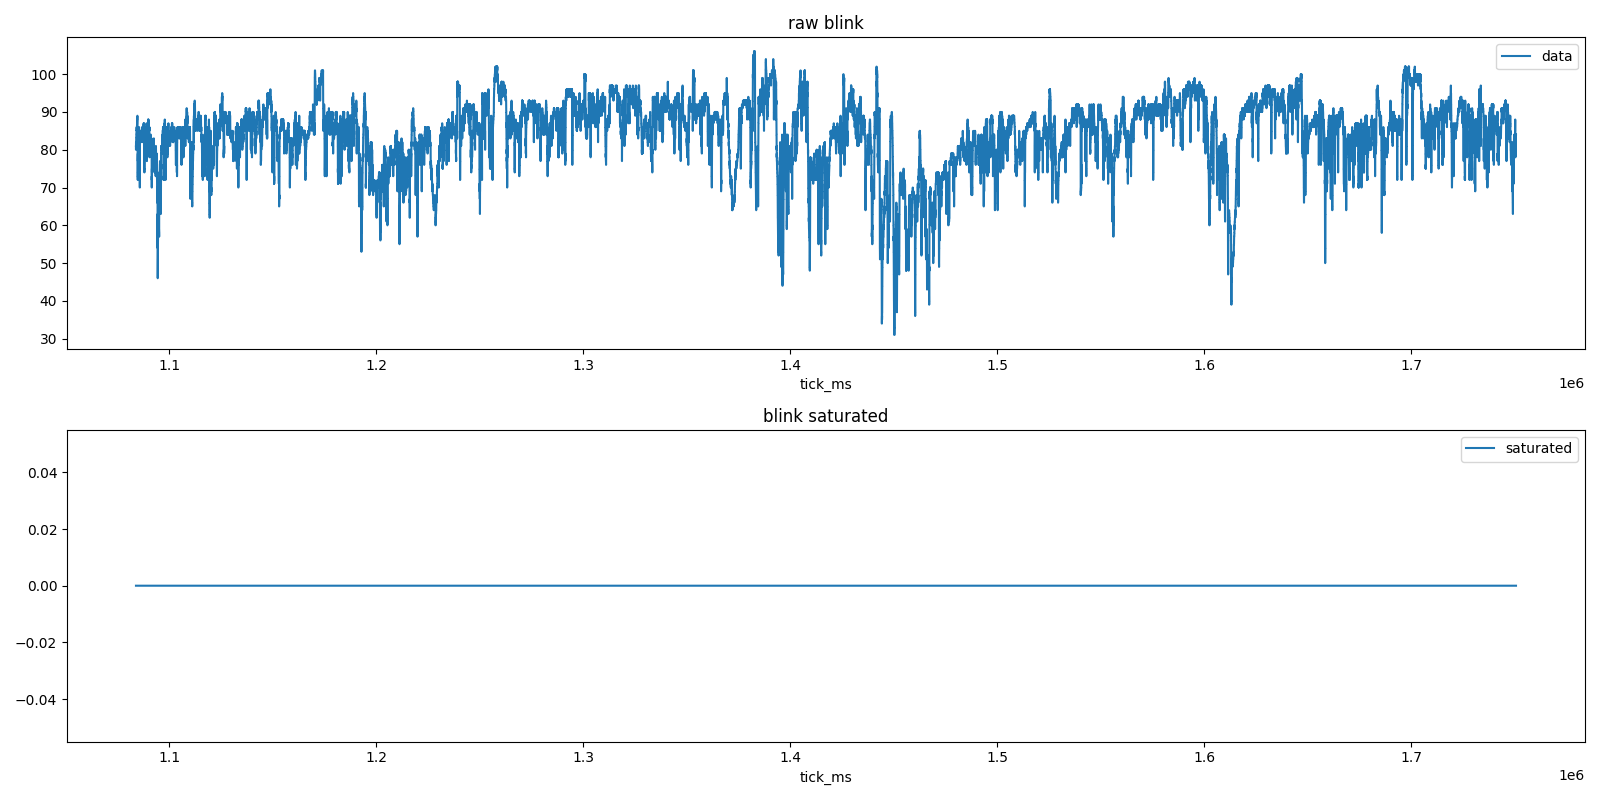

In [68]:
def parseBlinkRow(b):
    packetLength = int(b[6])
    blink_df_row = pd.DataFrame(data=[b[0:12] for i in range(packetLength)], columns=['serverTS', 'packetTypeLetter', 'packetType', 'packetNum', 'msFromStart', 'epoch', 'packetSize', 'res0', 'res1', 'res2','res3','res4']) 
    blink_df_row = pd.concat([blink_df_row, pd.Series(data=b[13:], name='data').astype('int32')], axis=1)
    
    blinkSampleRate = 1000 # 1kHz
    blinkSamplePeriod_ms = 1000 * (1/blinkSampleRate) # 1 ms
    blink_df_row["tick_ms"] = blink_df_row['msFromStart'].astype(int) 
    blink_df_row["tick_ms"] -= (packetLength - np.array(range(1, packetLength+1))) * blinkSamplePeriod_ms
    
    blink_df_row["saturated"] = blink_df_row["res0"].astype(int)
    
    return blink_df_row
    
blinks_df = pd.DataFrame()
for b in blinks[1000:3000]:
    blinks_df = pd.concat([blinks_df, parseBlinkRow(b)], axis=0)
blinks_df.reset_index(inplace=True)

fig, ax = plt.subplots(2,1, figsize=(16,8))
blinks_df.plot(x='tick_ms', y='data', ax=ax[0], title='raw blink')
blinks_df.plot(x='tick_ms', y='saturated', ax=ax[1], title='blink saturated')
plt.tight_layout()

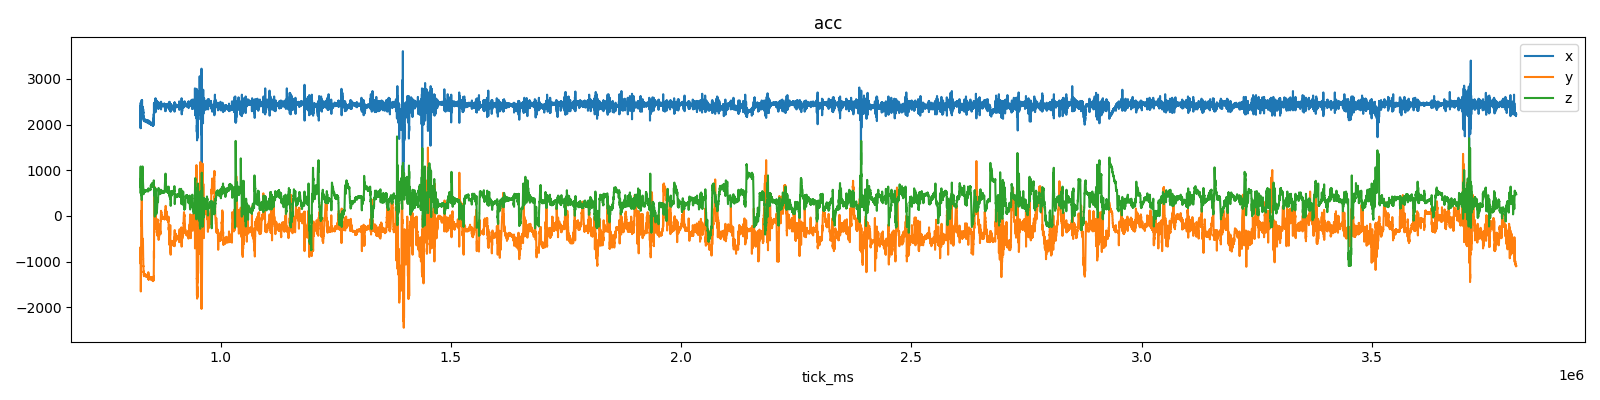

In [69]:
def parseXYZRow(p):
    packetLength = 25
    df_row = pd.DataFrame(data=[p[0:12] for i in range(packetLength)], columns=['serverTS', 'packetTypeLetter', 'packetType', 'packetNum', 'msFromStart', 'epoch', 'packetSize', 'res0', 'res1', 'res2','res3','res4']) 
    df_row = pd.concat([df_row, pd.DataFrame(data=np.array(p[13:]).astype('int32').reshape(-1,5), columns=['x','y','z','imu_tick_ms','tick_ms'])], axis=1)
    return df_row

acc_df = pd.DataFrame()
for a in acc[-3000:]:
    acc_df = pd.concat([acc_df, parseXYZRow(a)], axis=0)    
acc_df = acc_df[acc_df['x']<5000]
acc_df = acc_df[acc_df['x']>-5000]
acc_df.reset_index(inplace=True)

fig, ax = plt.subplots(1,1, figsize=(16,4))
acc_df.plot(x='tick_ms', y=['x','y','z'], ax=ax, title='acc')
plt.tight_layout()

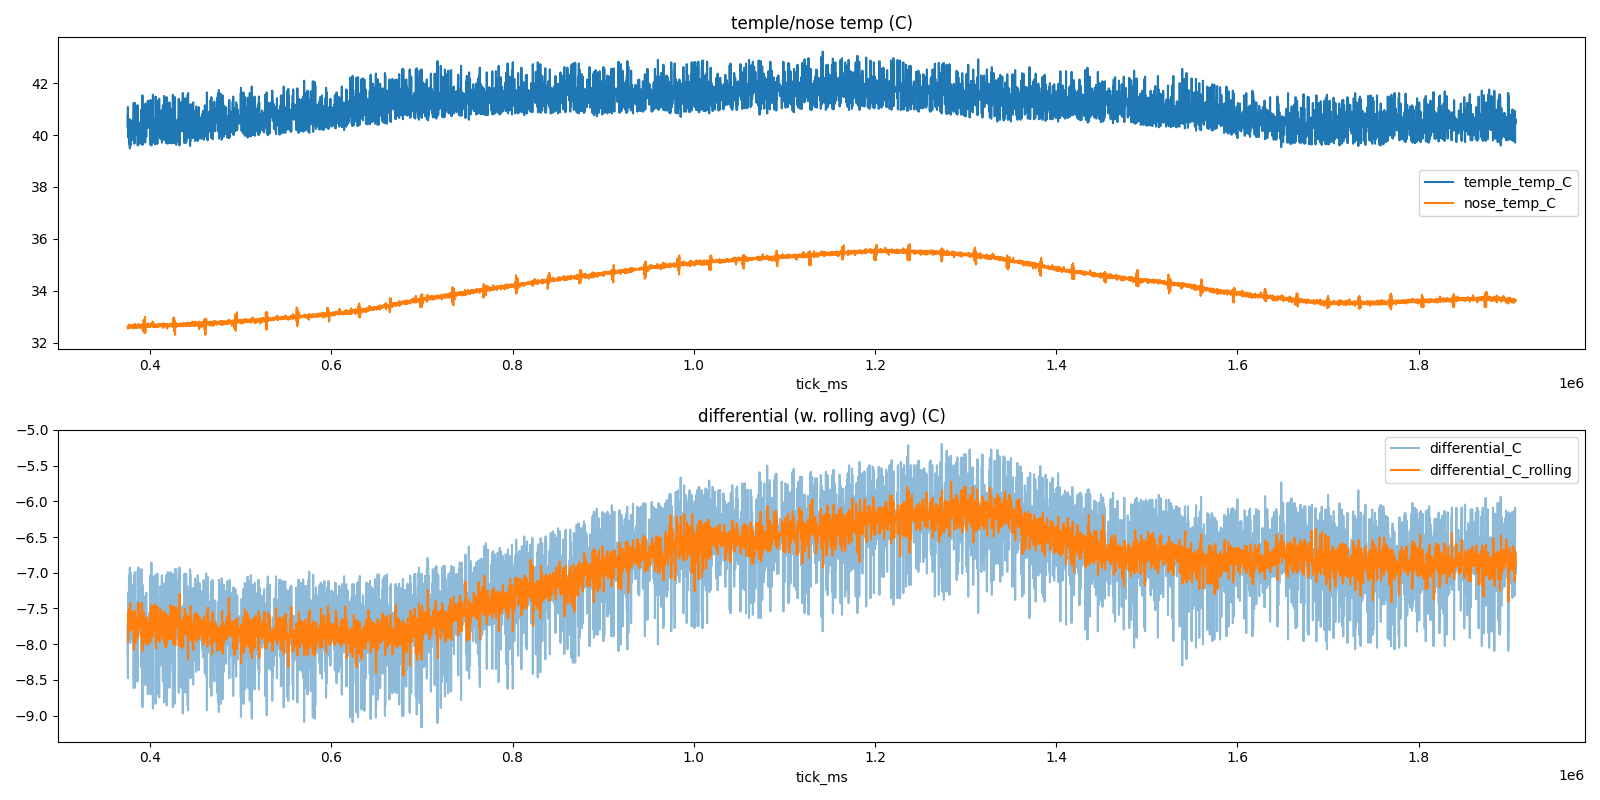

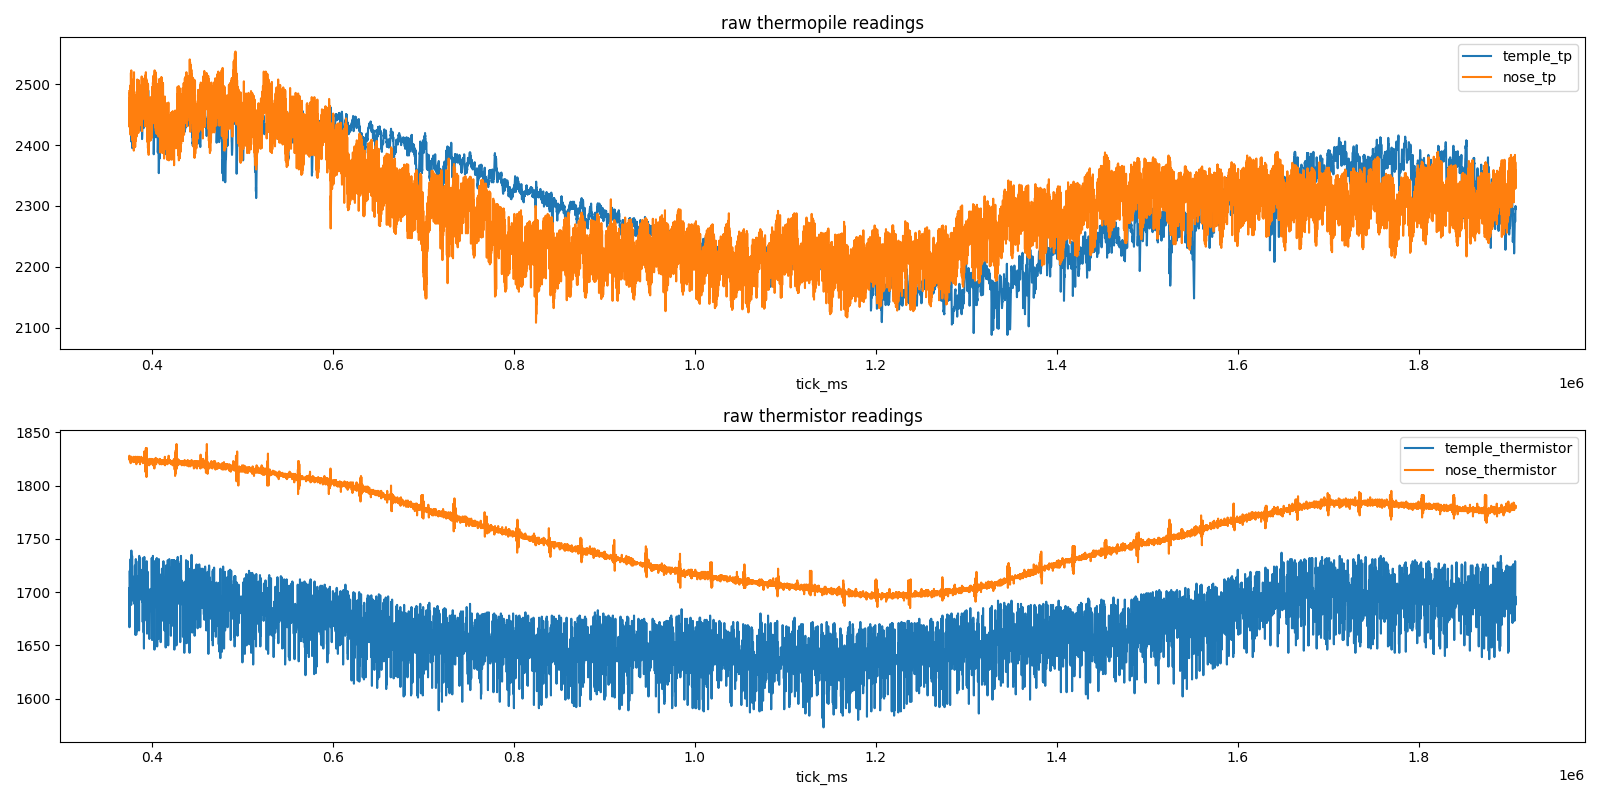

In [70]:
def parseThermalRow(t):
    
    tempSamplePeriod_ms = 100
    numInnerPackets = 4
    rowsInInnerPacket = 5
    # each row has 128 values; 4x 32 value 'packets'; 
    # each 32 has 5 repetitions of 6 values of data + 2 (tick,epoch)
    # these 6 values are interleaved; i.e. the first three are temple numbers, and the first
    # 15 sets of three are temple vals; the second 15 sets of 3 are the corresponding nose vals.
    # to get a timestamped packet, we need [0,1,2] matched with [15,16,17] and so on within each
    # 32 value 'packet'.  
    
    df_row = pd.DataFrame(data=[t[0:12] for i in range(numInnerPackets*rowsInInnerPacket)], columns=['serverTS', 'packetTypeLetter', 'packetType', 'packetNum', 'msFromStart', 'epoch', 'packetSize', 'res0', 'res1', 'res2','res3','res4']) 
    
    payload = np.array(t[13:]).astype(np.int32).reshape(numInnerPackets, -1)
    
    def flatten(t): return [item for sublist in t for item in sublist]
    reindex = flatten([[*range(i*3,i*3+3)] + [*range(15+i*3, 18+i*3)] + [-2,-1] for i in range(rowsInInnerPacket)])
    proper_payload = payload[:,reindex].reshape(-1,8)
    
    df_row = pd.concat([df_row, pd.DataFrame(data=proper_payload, columns=["temple_tp","temple_thermistor","secondary_temple_tick_ms","nose_tp","nose_thermistor","secondary_nose_tick_ms","tick_ms","epoch"])], axis=1)
    df_row['tick_ms'] -= tempSamplePeriod_ms * np.array([4,3,2,1,0] * numInnerPackets)
    
    return df_row
    
def convert_thermistor_to_K(raw_value):
    # STEP 1. Calc R_thermistor value given ADC_val
    R_divider = 100000
    ADC_max = 4095
    
    R_t = (R_divider * raw_value/ADC_max) / (1 - raw_value/ADC_max)
    
    # STEP 2. Convert R_t to temp
    R_0 = 100000
    T_0 = 298.15
    Beta = 3960
    R_inf = R_0 * math.exp(-Beta/T_0)
    
    Temp_K = Beta / np.log(R_t / R_inf)
    return Temp_K
    
def convert_thermopile_to_C(raw_val, T_ref_K, A, a_0, a_1):
    #STEP 1. Calc V_thermopile based on preamp gain and bias
    V_tp = (((raw_val / 4095) * 3.3) - (1.15+0.6084))/1000.0
    
    #STEP 2. Solve for Temperature!
    f_V_tp = (V_tp - a_0) + a_1 * (V_tp - a_0)**2
    T_obj = (T_ref_K**4 + f_V_tp/A)**0.25
    return (T_obj - 273.15)
    
def convert_nose_temp(raw_val, raw_thermistor):
    A   =  7.8e-10
    a_0 = -2.31e-01
    a_1 =  3.61e-03
    return convert_thermopile_to_C(raw_val, 
                                  convert_thermistor_to_K(raw_thermistor), 
                                  A, a_0, a_1)
    
def convert_temple_temp(raw_val, raw_thermistor):
    A   =  4.21e-10
    a_0 = -3.62e-01
    a_1 =  8.31e-02
    return convert_thermopile_to_C(raw_val, 
                                  convert_thermistor_to_K(raw_thermistor), 
                                  A, a_0, a_1)


thermal_df = pd.DataFrame()
for t in thermal:
    thermal_df = pd.concat([thermal_df, parseThermalRow(t)], axis=0)    
thermal_df.reset_index(inplace=True)

thermal_df['nose_temp_C'] = thermal_df.apply(lambda x: convert_nose_temp(x['nose_tp'], x['nose_thermistor']), axis=1)
thermal_df['temple_temp_C'] = thermal_df.apply(lambda x: convert_temple_temp(x['temple_tp'], x['temple_thermistor']), axis=1)
thermal_df['differential_C'] = thermal_df['nose_temp_C'] - thermal_df['temple_temp_C']
thermal_df['differential_C_rolling'] = thermal_df['differential_C'].rolling(5).mean()

fig, ax = plt.subplots(2,1,figsize=(16,8)) 
thermal_df.plot(x="tick_ms",y=["temple_temp_C","nose_temp_C"], ax=ax[0], title='temple/nose temp (C)')
thermal_df.plot(x="tick_ms",y="differential_C", ax=ax[1], alpha=0.5)
thermal_df.plot(x="tick_ms",y="differential_C_rolling", ax=ax[1], title='differential (w. rolling avg) (C)')
plt.tight_layout()


fig, ax = plt.subplots(2,1, figsize=(16,8))
thermal_df.plot(x='tick_ms', y=['temple_tp', 'nose_tp'], ax=ax[0], title='raw thermopile readings')
thermal_df.plot(x='tick_ms', y=['temple_thermistor','nose_thermistor'], ax=ax[1], title='raw thermistor readings')
plt.tight_layout()

In [ ]:
sess3 = {

   
    'P5':['recording_052123_030959.csv', 'recording_052123_032804.csv'],
    6/06 10:46 UTC-04:00	0h 23m 36s (5) FALSE START AT 9:28 -> 0h 33m 40s (DELETE!!)

    
    'P3':['recording_061323_130555.csv', 'recording_061323_132342.csv'],
    06/14 13:51 UTC-04:00	0h 29m 39s (3)
    

}